<a href="https://colab.research.google.com/github/ASatya-J107/Data_Science_Project_1_Exploratory_Data_Analysis/blob/main/Data_Science_Project_1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [416]:
url = 'https://raw.githubusercontent.com/ASatya-J107/Data_Science_Project_1_Exploratory_Data_Analysis/main/Mobile_phone_price.csv'
df = pd.read_csv(url)
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [417]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [418]:
#Change column names for Storage and Ram
df.rename(columns = {'Storage ':'Storage (GB)', 'RAM ':'RAM (GB)'}, inplace = True)
df.columns

Index(['Brand', 'Model', 'Storage (GB)', 'RAM (GB)', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [419]:
df.shape

(407, 8)

In [420]:
checking = []

for col in df.columns:
    dtypes = df[col].dtypes
    isnull = df[col].isnull().sum()
    notnull = df[col].notna().sum()
    unique = df[col].nunique()

    checking.append([col, dtypes, isnull, notnull, unique])
    check = pd.DataFrame(checking)

check.columns = ['col', 'dtypes', 'isnull', 'notnull', 'unique']
check

,col,dtypes,isnull,notnull,unique
0,Brand,object,0,407,16
1,Model,object,0,407,239
2,Storage (GB),object,0,407,13
3,RAM (GB),object,0,407,20
4,Screen Size (inches),object,0,407,41
5,Camera (MP),object,0,407,143
6,Battery Capacity (mAh),int64,0,407,48
7,Price ($),object,0,407,89


In [421]:
duplicate_row = df[df.duplicated()]
print("Jumlah baris terduplikasi: ", duplicate_row.shape)

Jumlah baris terduplikasi:  (26, 8)


In [422]:
#drop duplicated row
df = df.drop_duplicates()
duplicate_row = df[df.duplicated()]
print("Jumlah baris terduplikasi: ", duplicate_row.shape)

Jumlah baris terduplikasi:  (0, 8)


In [423]:
df['Price ($)'].unique()

array(['999', '1199', '899', '279', '799', '249', '699', '329', '449',
       '199', '299', '379', '179', '729', '599', '139', '189', '399',
       '259', '159', '229', '499', '129', '529', '369', '1099', '169',
       '99', '459', '239', '1299', '429', '659', '269', '359', '$799 ',
       '$399 ', '$699 ', '$329 ', '$999 ', '$549 ', '$1,299 ', '$899 ',
       '$449 ', '$319 ', '$269 ', '$349 ', '$279 ', '$249 ', '$299 ',
       '$969 ', '$1,199 ', '$149 ', '$139 ', '$99 ', '$199 ', '$169 ',
       '$499 ', '$179 ', '$219 ', '$229 ', '$239 ', '$109 ', '$189 ',
       '$389 ', '$309 ', '$369 ', '$129 ', '$849 ', '$469 ', '$209 ',
       '$119 ', '$339 ', '$429 ', '$159 ', '$379 ', '$289 ', '130', '749',
       '149', '969', '649', '349', '419', '1399', '1999', '119', '319',
       '1049'], dtype=object)

In [424]:
#reformat column Price ($)
df['Price ($)'] = df['Price ($)'].str.replace('$','', regex=False)
df['Price ($)'] = df['Price ($)'].str.replace(',','', regex=False)
df['Price ($)'] = df['Price ($)'].astype(int)
df['Price ($)'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049])

In [425]:
df['Storage (GB)'].unique()

array(['128 GB', '256 GB', '64 GB', '32 GB', '128GB', '256GB', '64GB',
       '32GB', '256', '64', '128', '512', '32'], dtype=object)

In [426]:
#reformat column Storage (GB)
df['Storage (GB)'] = df['Storage (GB)'].str.replace('GB','', regex=False)
df['Storage (GB)'] = df['Storage (GB)'].str.replace(' ','', regex=False)
df['Storage (GB)'] = df['Storage (GB)'].astype(int)
df['Storage (GB)'].value_counts()

128    233
64      78
256     40
32      27
512      3
Name: Storage (GB), dtype: int64

In [427]:
df['RAM (GB)'].unique()

array(['6 GB', '12 GB', '8 GB', '4 GB', '3 GB', '2 GB', '4GB', '8GB',
       '6GB', '12GB', '3GB', '2GB', '5GB', '12', '3', '6', '8', '4', '16',
       '2'], dtype=object)

In [428]:
#reformat column RAM (GB)
df['RAM (GB)'] = df['RAM (GB)'].str.replace('GB','', regex=False)
df['RAM (GB)'] = df['RAM (GB)'].str.replace(' ','', regex=False)
df['RAM (GB)'] = df['RAM (GB)'].astype(int)
df['RAM (GB)'].value_counts()

4     121
6      99
8      90
3      33
12     25
2      11
5       1
16      1
Name: RAM (GB), dtype: int64

In [429]:
df['Screen Size (inches)'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [430]:
#reformat column Screen Size (inches)
df['Screen Size (inches)'] = df['Screen Size (inches)'].str.replace('6.8 + 3.9','10.7', regex=False) #replace multiple screen size with total value
df['Screen Size (inches)'] = df['Screen Size (inches)'].str.replace(' (unfolded)','', regex=False) #remove string unfolded
df['Screen Size (inches)'] = df['Screen Size (inches)'].astype(float)
df['Screen Size (inches)'].unique()

array([ 6.1 ,  6.8 ,  6.7 ,  6.67,  6.4 ,  6.55,  6.78,  6.43,  6.5 ,
        6.62,  5.4 ,  6.2 ,  6.51,  6.6 ,  4.7 ,  6.58,  6.52,  6.44,
        6.53,  6.56, 10.7 ,  4.5 ,  6.39,  5.9 ,  5.5 ,  6.81,  5.99,
        6.82,  6.3 ,  6.22,  6.  ,  6.35,  6.9 ,  6.76,  6.49,  6.72,
        5.7 ,  6.47,  7.6 ,  6.15,  6.57])

In [431]:
df['Camera (MP)'].unique()

array(['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2',
       '64 + 8 + 5 + 2', '50 + 12.2', '12 + 12', '48 + 8 + 2 + 2',
       '50 + 13 + 16 + 2', '50 + 48 + 12 + 8', '64 + 8 + 2',
       '64 + 12 + 5 + 5', '50 + 50 + 13 + 3', '64 + 8 + 5',
       '64 + 12 + 12', '50 + 2 + 2', '48 + 2 + 2', '50 + 8 + 2 + 2',
       '48 + 5', '48 + 50 + 2', '108 + 8 + 5 + 2', '13 + 2 + 2', '13 + 2',
       '12', '48 + 5 + 2', '50 + 8 + 2', '64 + 8 + 2 + 2', '48 + 8 + 5',
       '64 + 8', '48 + 5 + 2 + 2', '50 + 2', '64 + 12 + 8 + 5', '64 + 2',
       '48 + 13 + 13', '12MP + 12MP', '64MP + 12MP + 12MP',
       '50MP + 8MP + 2MP', '50MP + 12MP', '48MP + 8MP + 2MP + 2MP',
       '64MP + 8MP + 2MP', '50MP + 48MP + 12MP + 8MP',
       '50MP + 16MP + 13MP + 2MP', '108MP + 16MP + 8MP', '48MP + 13MP',
       '12MP + 12MP + 12MP', '64MP + 13MP + 12MP', '64MP + 12MP + 8MP',
       '13MP + 5MP', '64MP + 12MP + 8MP + 5MP', '108MP + 8MP + 5MP + 2MP',
       '48MP + 50MP + 2MP', '50MP + 2MP + 2MP', '108MP 

In [432]:
#reformat column Camera (MP)
df['Camera (MP)'] = df['Camera (MP)'].str.replace('MP','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace(' ','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace('D','')
df['Camera (MP)'] = df['Camera (MP)'].str.replace('ToF','')
df['Camera (MP)'].unique()

array(['12+12+12', '108+10+10+12', '48+50+8+2', '64+8+5+2', '50+12.2',
       '12+12', '48+8+2+2', '50+13+16+2', '50+48+12+8', '64+8+2',
       '64+12+5+5', '50+50+13+3', '64+8+5', '64+12+12', '50+2+2',
       '48+2+2', '50+8+2+2', '48+5', '48+50+2', '108+8+5+2', '13+2+2',
       '13+2', '12', '48+5+2', '50+8+2', '64+8+2+2', '48+8+5', '64+8',
       '48+5+2+2', '50+2', '64+12+8+5', '64+2', '48+13+13', '50+12',
       '50+16+13+2', '108+16+8', '48+13', '64+13+12', '64+12+8', '13+5',
       '108+8+2', '64+5+2+2', '64+12', '48+50+8', '50+48+48', '8+2',
       '12+12+8', '64+13+5', '12+13', '64+8+5+5', '48+8+2', '48+2',
       '108+12+10+10', '50+5', '48+8+5+5', '108+8+2+2', '13', '48+8+5+2',
       '13+5+2', '8', '13+5+2+2', '13+8+5+2', '13+8+2+2', '12+2+2',
       '13+8+2', '25+8+5', '108+12+12', '12.2+16', '50+20+12+3',
       '64+12+2+2', '108+13+5', '48+16+5+2', '12+7', '50+12+40+3',
       '50+8+16+2', '48+12+5', '48+48+8+5', '40+40+8+3', '48+12+13',
       '40+20+8+', '48+16+8', '16

In [433]:
#add columns to represent main camera resolution
camera_split = df['Camera (MP)'].str.split('+', expand=True)
camera_split = camera_split.apply(pd.to_numeric, errors='coerce')
df['Main Camera MP'] = camera_split.max(axis=1)
df['Main Camera MP'].value_counts()

48.0     103
64.0      85
13.0      65
50.0      56
12.0      37
108.0     19
8.0        7
16.0       6
40.0       2
25.0       1
Name: Main Camera MP, dtype: int64

In [434]:
#add columns to represent number of camera
df['Number of Cameras'] = df['Camera (MP)'].str.count('\\+') + 1
df['Number of Cameras'].value_counts()

3    169
4    138
2     66
1      8
Name: Number of Cameras, dtype: int64

In [435]:
df.describe()

,Storage (GB),RAM (GB),Screen Size (inches),Battery Capacity (mAh),Price ($),Main Camera MP,Number of Cameras
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,124.556430,5.879265,6.486168,4683.958005,411.706037,44.047244,3.146982
std,66.124485,2.466857,0.377731,792.927831,305.185669,24.602586,0.774204
min,32.000000,2.000000,4.500000,1821.000000,99.000000,8.000000,1.000000
25%,64.000000,4.000000,6.440000,4300.000000,199.000000,13.000000,3.000000
50%,128.000000,6.000000,6.500000,5000.000000,299.000000,48.000000,3.000000
75%,128.000000,8.000000,6.580000,5000.000000,499.000000,64.000000,4.000000
max,512.000000,16.000000,10.700000,7000.000000,1999.000000,108.000000,4.000000


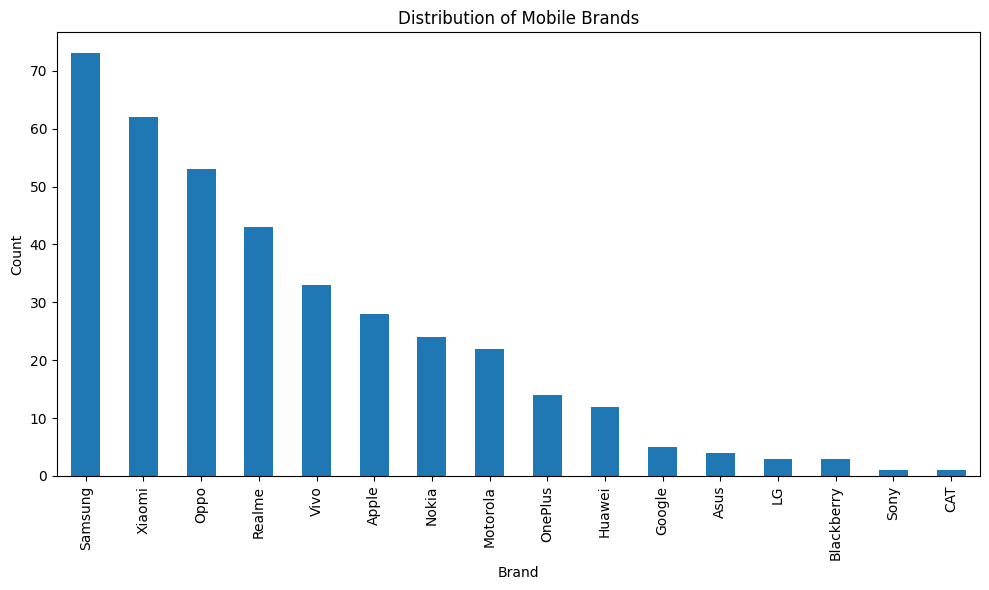

In [446]:
plt.figure(figsize=(10, 6))
df['Brand'].value_counts().plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Mobile Brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

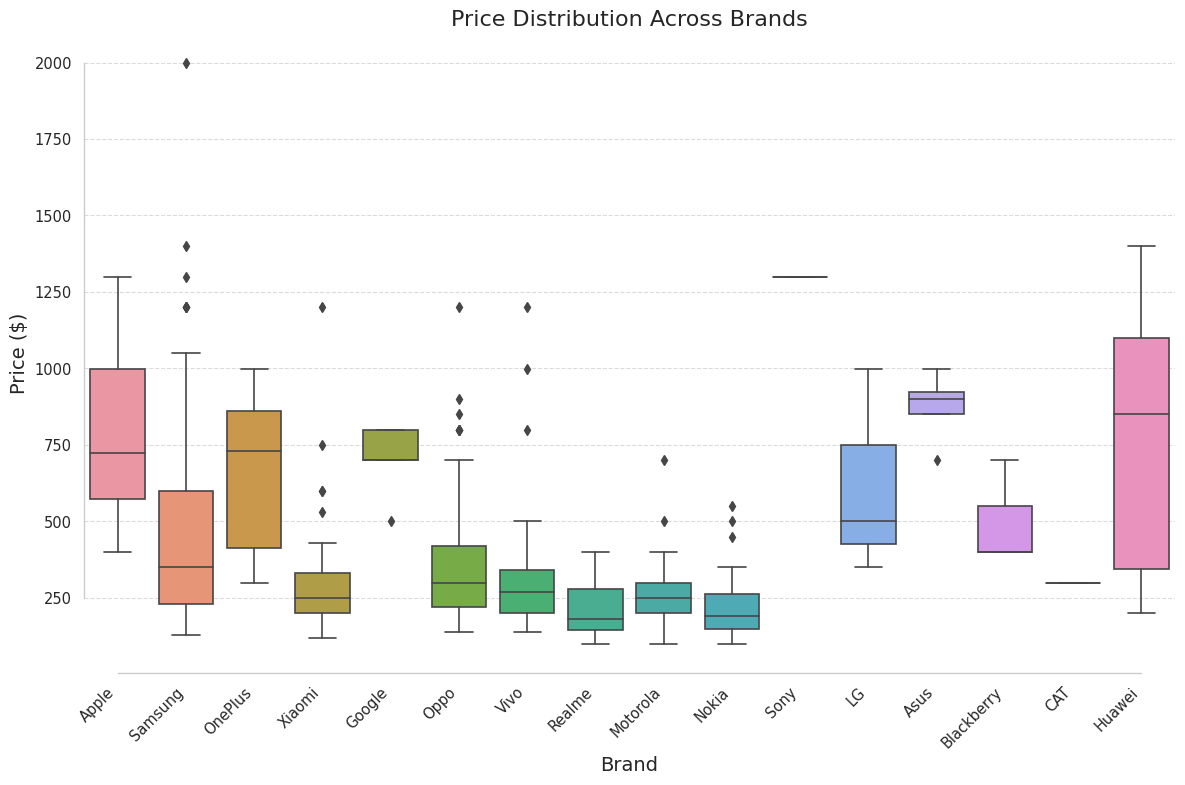

In [470]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.2)

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x=df['Brand'], y=df['Price ($)'])

ax.set_xlabel('Brand', fontsize=14)
ax.set_ylabel('Price ($)', fontsize=14)
ax.set_title('Price Distribution Across Brands', fontsize=16)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

sns.despine(trim=True)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

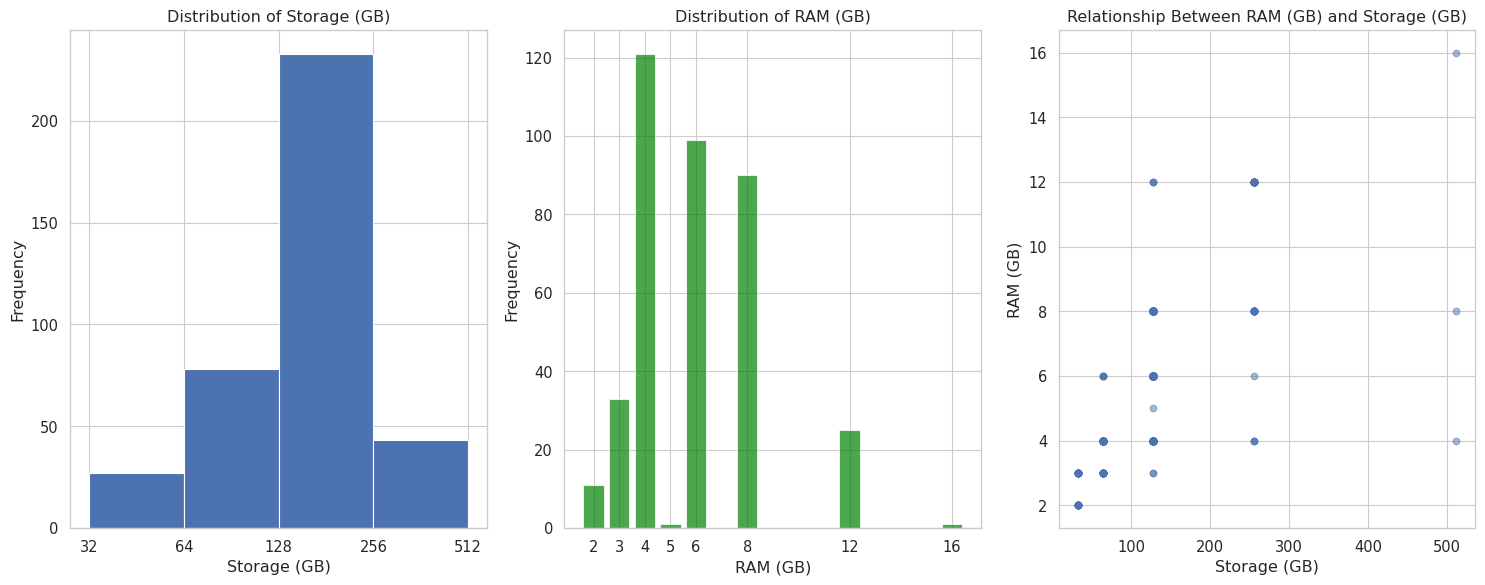

In [481]:
custom_bins_storage = 2 ** np.arange(5, 10)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))


ax1.hist(df['Storage (GB)'], bins=custom_bins_storage)
ax1.set_xlabel('Storage (GB)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Storage (GB)')
ax1.set_xscale('log', base=2)
ax1.set_xticks(custom_bins_storage)
ax1.set_xticklabels([str(bin) for bin in custom_bins_storage])

ram_counts = df['RAM (GB)'].value_counts().sort_index()
ram_values = ram_counts.index
ram_frequencies = ram_counts.values
ax2.bar(ram_values, ram_frequencies, color='green', alpha=0.7)
ax2.set_xlabel('RAM (GB)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of RAM (GB)')
ax2.set_xticks(ram_values[ram_frequencies > 0])

ax3.scatter(df['Storage (GB)'], df['RAM (GB)'], alpha=0.5)
ax3.set_xlabel('Storage (GB)')
ax3.set_ylabel('RAM (GB)')
ax3.set_title('Relationship Between RAM (GB) and Storage (GB)')
ax3.grid(True)

plt.tight_layout()
plt.show()

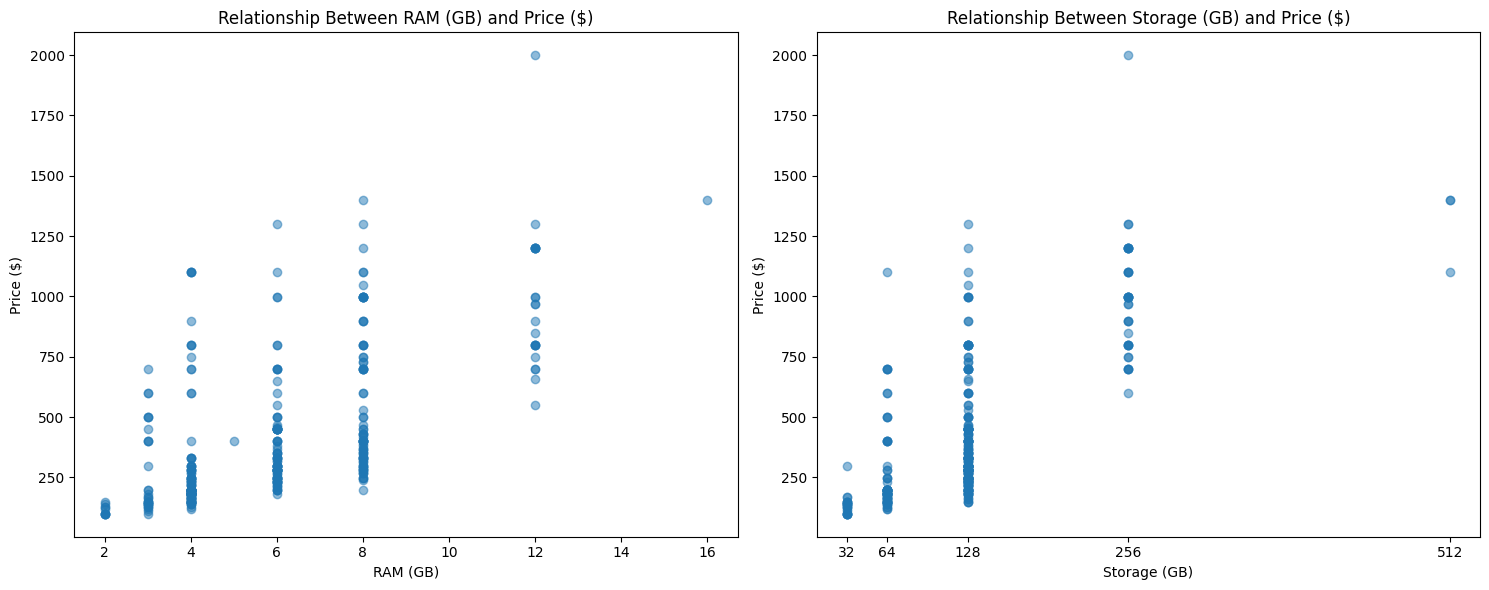

In [461]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(df['RAM (GB)'], df['Price ($)'], alpha=0.5)
ax1.set_xlabel('RAM (GB)')
ax1.set_ylabel('Price ($)')
ax1.set_title('Relationship Between RAM (GB) and Price ($)')

ax2.scatter(df['Storage (GB)'], df['Price ($)'], alpha=0.5)
ax2.set_xlabel('Storage (GB)')
ax2.set_ylabel('Price ($)')
ax2.set_title('Relationship Between Storage (GB) and Price ($)')

ax2.set_xticks(df['Storage (GB)'].dropna().unique())

plt.tight_layout()
plt.show()

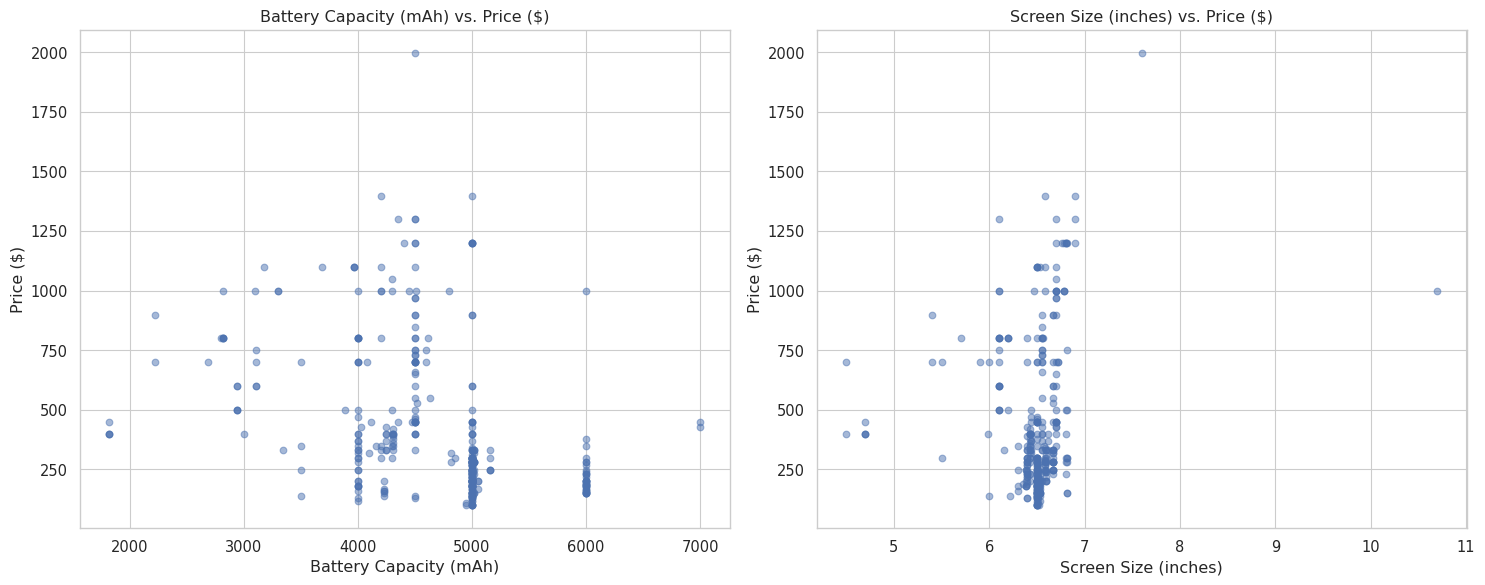

In [471]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(df['Battery Capacity (mAh)'], df['Price ($)'], alpha=0.5)
ax1.set_xlabel('Battery Capacity (mAh)')
ax1.set_ylabel('Price ($)')
ax1.set_title('Battery Capacity (mAh) vs. Price ($)')

ax2.scatter(df['Screen Size (inches)'], df['Price ($)'], alpha=0.5)
ax2.set_xlabel('Screen Size (inches)')
ax2.set_ylabel('Price ($)')
ax2.set_title('Screen Size (inches) vs. Price ($)')

plt.tight_layout()
plt.show()

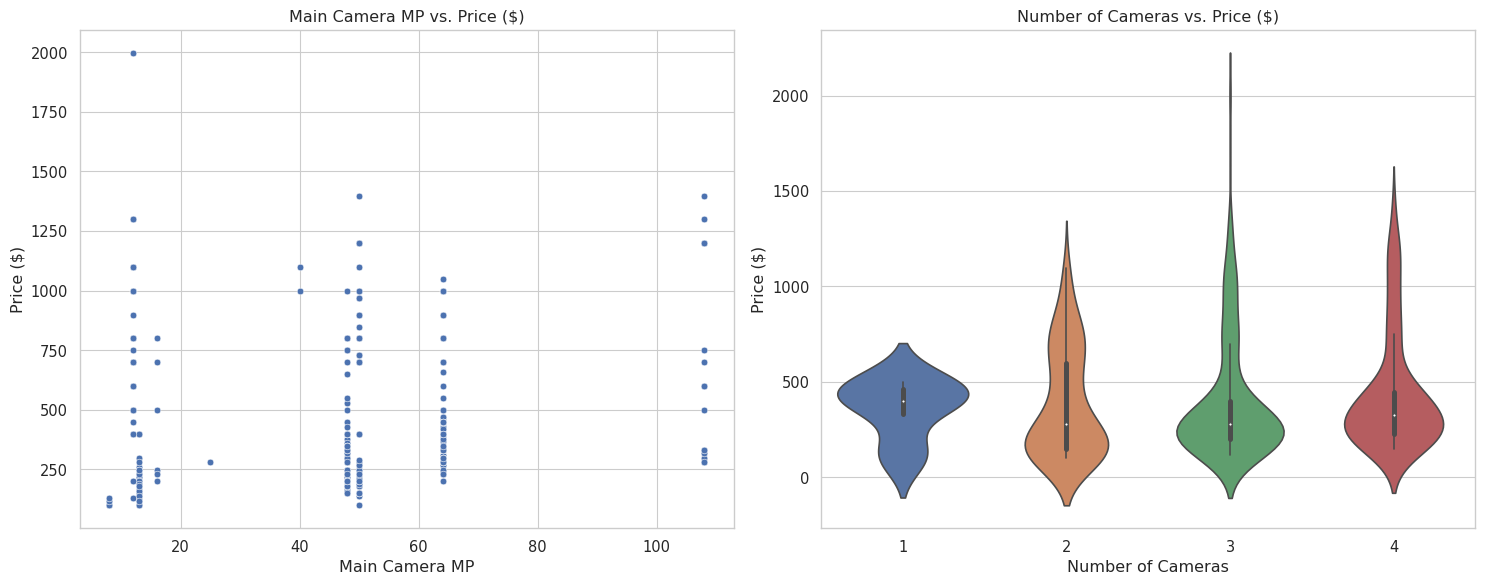

In [480]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Main Camera MP', y='Price ($)', data=df, ax=ax1)
ax1.set_xlabel('Main Camera MP')
ax1.set_ylabel('Price ($)')
ax1.set_title('Main Camera MP vs. Price ($)')

sns.violinplot(x=df['Number of Cameras'], y=df['Price ($)'], ax=ax2)
ax2.set_xlabel('Number of Cameras')
ax2.set_ylabel('Price ($)')
ax2.set_title('Number of Cameras vs. Price ($)')

plt.tight_layout()
plt.show()

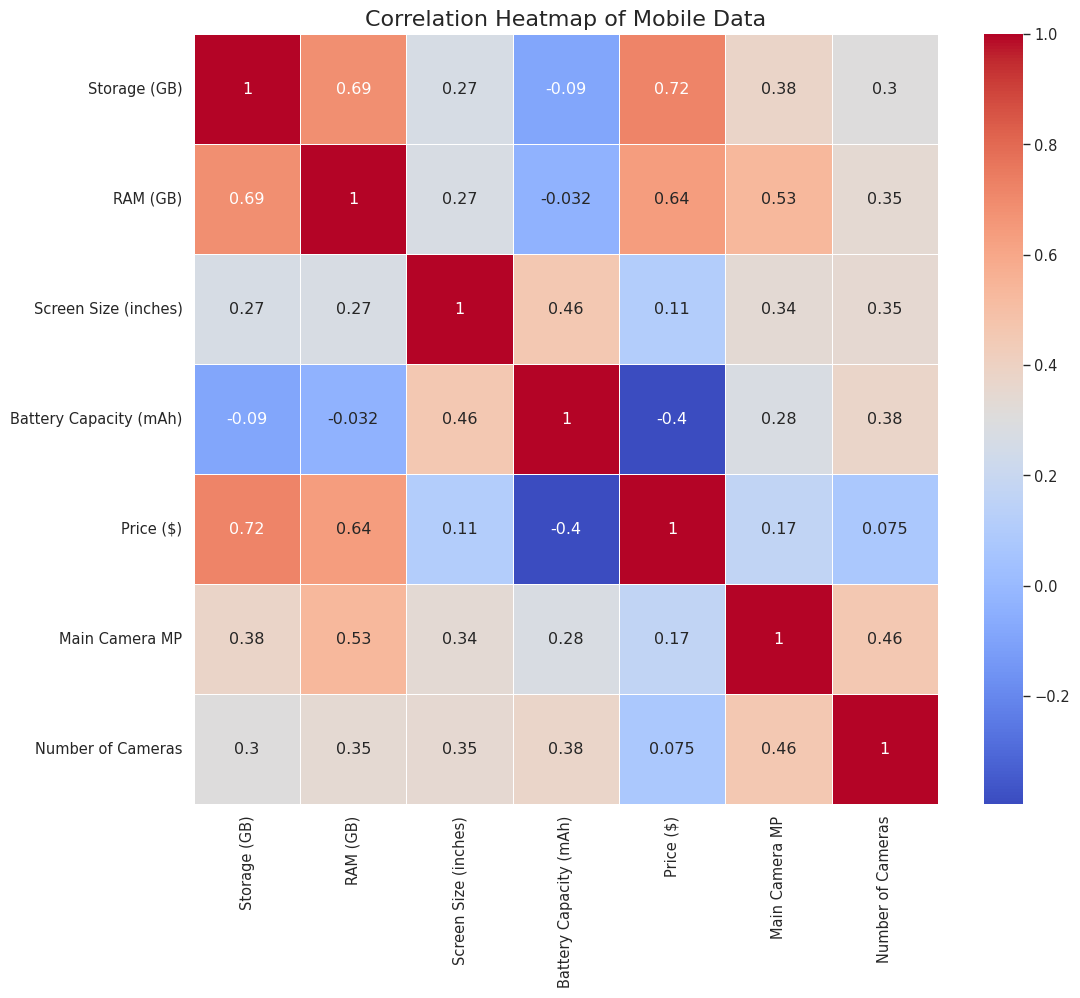

In [474]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap of Mobile Data', fontsize=16)
plt.show()